In [1]:
import calitp
from calitp.tables import tbl
from siuba import *

import pandas as pd
import numpy as np

import geopandas as gpd
import seaborn as sns

from ipyleaflet import Map, GeoJSON, projections, basemaps, GeoData, LayersControl, WidgetControl, GeoJSON
from ipywidgets import Text, HTML

/Users/edasmalchi/anaconda3/envs/pd1/lib/python3.9/site-packages/google/auth/_default.py:68: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [2]:
bbb_shapes = tbl.gtfs_schedule.shapes() >> filter(_.calitp_itp_id == 300) >> collect()

In [3]:
bbb_shapes >> filter(_.shape_id == '25386') >> mutate(shape_pt_sequence = _.shape_pt_sequence.astype('int64')) >> arrange(_.shape_pt_sequence) 

,calitp_itp_id,calitp_url_number,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled,calitp_extracted_at
116,300,0,25386,34.015539,-118.445299,1,0,2021-09-01
151,300,0,25386,34.015149,-118.446069,2,0.083,2021-09-01
8,300,0,25386,34.014789,-118.44681,3,0.1619,2021-09-01
4,300,0,25386,34.014869,-118.446929,4,0.1761,2021-09-01
192,300,0,25386,34.014869,-118.446969,5,0.1801,2021-09-01
...,...,...,...,...,...,...,...,...
54,300,0,25386,34.02141,-118.482609,105,5.8593,2021-09-01
87,300,0,25386,34.021659,-118.482299,106,5.8996,2021-09-01
81,300,0,25386,34.022189,-118.48163,107,5.9845,2021-09-01
47,300,0,25386,34.02295,-118.4807,108,6.1054,2021-09-01


In [226]:
bbb_trips = tbl.gtfs_schedule.trips() >> filter(_.calitp_itp_id == 300) >> collect()

In [72]:
bbb_shapes = gpd.GeoDataFrame(bbb_shapes, 
                              geometry = gpd.points_from_xy(bbb_shapes.shape_pt_lon, bbb_shapes.shape_pt_lat),
                              crs = 'EPSG:4326').to_crs('EPSG:6414') ## https://epsg.io/6414 (meters)

test1 = bbb_shapes.dissolve(by='shape_id')

<AxesSubplot:>

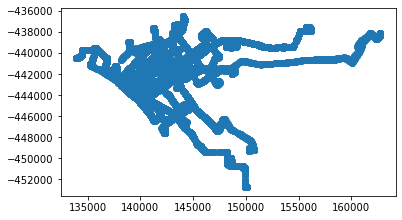

In [73]:
test1.plot()

In [74]:
##check this...
am_peak = (6, 9)
pm_peak = (3, 7)

In [76]:
bbb_stop_times = tbl.gtfs_schedule.stop_times() >> filter(_.calitp_itp_id == 300) >> collect()

In [77]:
## filter trips using stop times to peak trips?
## go from stops, interpolate?

In [237]:
bbb_trips.groupby('shape_id').count()

,calitp_itp_id,calitp_url_number,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,wheelchair_accessible,bikes_allowed,calitp_extracted_at
shape_id,,,,,,,,,,,,
25311,2,2,2,2,2,2,0,2,0,2,2,2
25313,136,136,136,136,136,136,0,136,0,136,136,136
25314,74,74,74,74,74,74,0,74,0,74,74,74
25315,76,76,76,76,76,76,0,76,0,76,76,76
25316,2,2,2,2,2,2,0,2,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
25398,4,4,4,4,4,4,0,4,0,4,4,4
25399,36,36,36,36,36,36,0,36,0,36,36,36
25400,36,36,36,36,36,36,0,36,0,36,36,36


In [79]:
bbb_stop_times

,calitp_itp_id,calitp_url_number,trip_id,stop_id,stop_sequence,arrival_time,departure_time,stop_headsign,pickup_type,drop_off_type,continuous_pickup,continuous_drop_off,shape_dist_traveled,timepoint,calitp_extracted_at
0,300,0,858159,1319,1,14:03:00,14:03:00,None,0,0,None,None,None,1,2021-09-01
1,300,0,856531,38,1,18:05:00,18:05:00,None,0,0,None,None,None,1,2021-09-01
2,300,0,858417,1184,1,10:17:00,10:17:00,None,0,0,None,None,None,1,2021-09-01
3,300,0,858262,1319,1,06:58:00,06:58:00,None,0,0,None,None,None,1,2021-09-01
4,300,0,860085,43,1,17:25:00,17:25:00,None,0,0,None,None,None,1,2021-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115287,300,0,857015,1344,55,21:30:00,21:30:00,None,0,0,None,None,21.4770,1,2021-09-01
115288,300,0,857041,1344,55,14:40:00,14:40:00,None,0,0,None,None,21.4770,1,2021-09-01
115289,300,0,857191,5,56,09:00:10,09:00:10,None,0,0,None,None,21.9159,0,2021-09-01
115290,300,0,857218,1217,57,08:02:36,08:02:36,None,0,0,None,None,22.2185,0,2021-09-01


In [247]:
import shapely
from shapely.geometry import LineString, MultiPoint
from shapely.ops import split, substring

In [248]:
test2 = (bbb_shapes
         >> filter(_.shape_id == '25313')
         >> mutate(shape_pt_sequence = _.shape_pt_sequence.astype('int64'))
         >> arrange(_.shape_pt_sequence) ##arrange, then convert to line to preserve order...
        )

In [249]:
line = LineString(list(test2['geometry'])) ##heck yeah

In [250]:
new2 = test2[['calitp_itp_id', 'shape_id', 'calitp_extracted_at']].iloc[0]

In [251]:
new2['geometry'] = line

In [257]:
new2 = gpd.GeoDataFrame(new2.transpose(), crs='EPSG:6414')

In [254]:
def split_every_km(linestring_geometry):
    linestring = linestring_geometry.iloc[0]
    lines = []
    for i in range(0, int(linestring.length), 1000):
#         print(i)
        lines.append((substring(linestring, i, i+1000), str(int(i/1000))))
    return lines

In [258]:
new2

,calitp_itp_id,shape_id,calitp_extracted_at,geometry
598,300,25313,2021-09-01,"LINESTRING (141244.246 -446319.465, 141214.980..."


In [259]:
## test a shapes df split into segments
new3 = pd.DataFrame()
for segment in split_every_km(new2.geometry):
    to_append = new2.drop(columns=['geometry'])
    to_append['geometry'] = segment[0]
    to_append['segment_sequence'] = segment[1]
#     print(to_append)
    new3 = new3.append(to_append)

In [260]:
import zlib

In [261]:
new3 = new3.astype({'calitp_itp_id': str})

## compute (hopefully unique) hash of segment id that can be used across routes/operators
new3['hqta_segment_id'] = new3.apply(lambda x:
                            zlib.crc32(
                                (x.calitp_itp_id + x.shape_id + x.segment_sequence).encode('utf-8')), axis=1)

In [262]:
new3

,calitp_itp_id,shape_id,calitp_extracted_at,geometry,segment_sequence,hqta_segment_id
598,300,25313,2021-09-01,"LINESTRING (141244.246 -446319.465, 141214.980...",0,3924624050
598,300,25313,2021-09-01,"LINESTRING (140665.966 -445508.477, 140660.934...",1,2666148388
598,300,25313,2021-09-01,"LINESTRING (140015.860 -444749.135, 139942.625...",2,132342686
598,300,25313,2021-09-01,"LINESTRING (139683.707 -444022.493, 139690.139...",3,1894011656
598,300,25313,2021-09-01,"LINESTRING (139064.584 -443319.275, 139061.037...",4,4001416875
598,300,25313,2021-09-01,"LINESTRING (139616.187 -442612.498, 139677.925...",5,2575824445
598,300,25313,2021-09-01,"LINESTRING (140323.078 -441905.244, 140334.227...",6,9348999
598,300,25313,2021-09-01,"LINESTRING (141027.815 -441196.031, 141044.181...",7,2005505809
598,300,25313,2021-09-01,"LINESTRING (141796.647 -440570.492, 141816.294...",8,3879111296
598,300,25313,2021-09-01,"LINESTRING (142672.477 -440088.151, 142696.872...",9,2419178006


In [263]:
## assign stops to segment

In [264]:
bbb_trips >> filter(_.shape_id == '25313')

,calitp_itp_id,calitp_url_number,route_id,service_id,trip_id,shape_id,trip_headsign,trip_short_name,direction_id,block_id,wheelchair_accessible,bikes_allowed,calitp_extracted_at
0,300,0,3328,1,855736,25313,UCLA,None,0,None,0,0,2021-09-01
1,300,0,3328,1,855775,25313,UCLA,None,0,None,0,0,2021-09-01
2,300,0,3328,1,855739,25313,UCLA,None,0,None,0,0,2021-09-01
3,300,0,3328,1,855778,25313,UCLA,None,0,None,0,0,2021-09-01
4,300,0,3328,1,855749,25313,UCLA,None,0,None,0,0,2021-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,300,0,3328,10,855987,25313,UCLA,None,0,None,0,0,2021-09-01
1652,300,0,3328,10,855985,25313,UCLA,None,0,None,0,0,2021-09-01
1653,300,0,3328,10,855981,25313,UCLA,None,0,None,0,0,2021-09-01
1654,300,0,3328,10,855979,25313,UCLA,None,0,None,0,0,2021-09-01


In [265]:
rt = tbl.gtfs_schedule.routes() >> filter(_.calitp_itp_id == 300) >> filter(_.route_id == '3328') >> collect()

In [266]:
rt

,calitp_itp_id,calitp_url_number,route_id,route_type,agency_id,route_short_name,route_long_name,route_desc,route_url,route_color,route_text_color,route_sort_order,continuous_pickup,continuous_drop_off,calitp_extracted_at
0,300,0,3328,3,6216179,1,Main St & Santa Monica Blvd/UCLA,None,http://bigbluebus.com/Routes-and-Schedules/Rou...,F8971D,000000,None,None,None,2021-09-01


In [275]:
bbb_stops = (tbl.gtfs_schedule.stops() 
             >> filter(_.calitp_itp_id == 300)
             >> select(_.stop_id, _.stop_lat, _.stop_lon)
             >> collect())
bbb_stops = gpd.GeoDataFrame(bbb_stops,
                             geometry = gpd.points_from_xy(bbb_stops.stop_lon, bbb_stops.stop_lat),
                            crs = 'EPSG:4326')

In [276]:
bbb_stops

,stop_id,stop_lat,stop_lon,geometry
0,869,34.017447,-118.458043,POINT (-118.45804 34.01745)
1,355,34.025240,-118.458474,POINT (-118.45847 34.02524)
2,1514,34.050078,-118.493970,POINT (-118.49397 34.05008)
3,1562,34.015676,-118.475689,POINT (-118.47569 34.01568)
4,412,34.047298,-118.463518,POINT (-118.46352 34.04730)
...,...,...,...,...
917,253,34.043934,-118.467908,POINT (-118.46791 34.04393)
918,524,34.032659,-118.481532,POINT (-118.48153 34.03266)
919,558,34.003129,-118.471068,POINT (-118.47107 34.00313)
920,1451,34.035780,-118.464933,POINT (-118.46493 34.03578)


In [271]:
bbb_stop_times >> filter(_.trip_id == '855736')

,calitp_itp_id,calitp_url_number,trip_id,stop_id,stop_sequence,arrival_time,departure_time,stop_headsign,pickup_type,drop_off_type,continuous_pickup,continuous_drop_off,shape_dist_traveled,timepoint,calitp_extracted_at
2515,300,0,855736,361,3,16:38:44,16:38:44,None,0,0,None,None,0.5066,0,2021-09-01
7747,300,0,855736,338,8,16:43:43,16:43:43,None,0,0,None,None,1.9601,0,2021-09-01
8749,300,0,855736,1664,9,16:45:05,16:45:05,None,0,0,None,None,2.3579,0,2021-09-01
10043,300,0,855736,1665,10,16:46:13,16:46:13,None,0,0,None,None,2.6873,0,2021-09-01
13239,300,0,855736,227,13,16:52:33,16:52:33,None,0,0,None,None,4.1363,0,2021-09-01
14182,300,0,855736,5,14,16:54:00,16:54:00,None,0,0,None,None,4.3520,1,2021-09-01
15349,300,0,855736,368,15,16:54:51,16:54:51,None,0,0,None,None,4.6016,0,2021-09-01
23976,300,0,855736,378,24,17:04:21,17:04:21,None,0,0,None,None,7.3975,0,2021-09-01
25694,300,0,855736,379,26,17:05:58,17:05:58,None,0,0,None,None,7.8718,0,2021-09-01
26013,300,0,855736,1637,27,17:07:00,17:07:00,None,0,0,None,None,8.1489,1,2021-09-01
